# Preparations

In [1]:
import sys
sys.path.append('../src/') # for graph_data

import altair as alt
import pandas as pd
import numpy as np
import torch
import sklearn.metrics as metrics
from Bio import Phylo as phy
# my libs
import graph_data as gd
from models import TreeSupport


data_path = 'data/'
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
# data
target_tree = phy.read(data_path+'tree/Other_eukaryota_2018.tre', 'newick')
test_dataset = gd.Trees(
    data_path+"tree/Eukaryota/",
    data_path+"alns/other_eukaryota_2018/",
    target_tree
)
test_dataset.data.x = test_dataset.data.x.float()
test_dataset.data.edge_attr = (torch.max(test_dataset.data.edge_attr)+0.001 - test_dataset.data.edge_attr).float()
test_dataset.data.edge_index = test_dataset.data.edge_index.long()
# 88 nodes max

# Model

In [7]:
model = TreeSupport(231, 400)

In [11]:
model.load_state_dict(torch.load('models/2gin_1sage_PAIRS(FUNGI_ARCHAEA).dct', map_location='cpu'))

<All keys matched successfully>

In [12]:
predicted = []
actual = []
for tree in test_dataset:
    predicted.append(model(tree).squeeze().detach().numpy())
    actual.append(tree.y.squeeze().numpy())

predicted = np.concatenate(predicted)
actual = np.concatenate(actual)

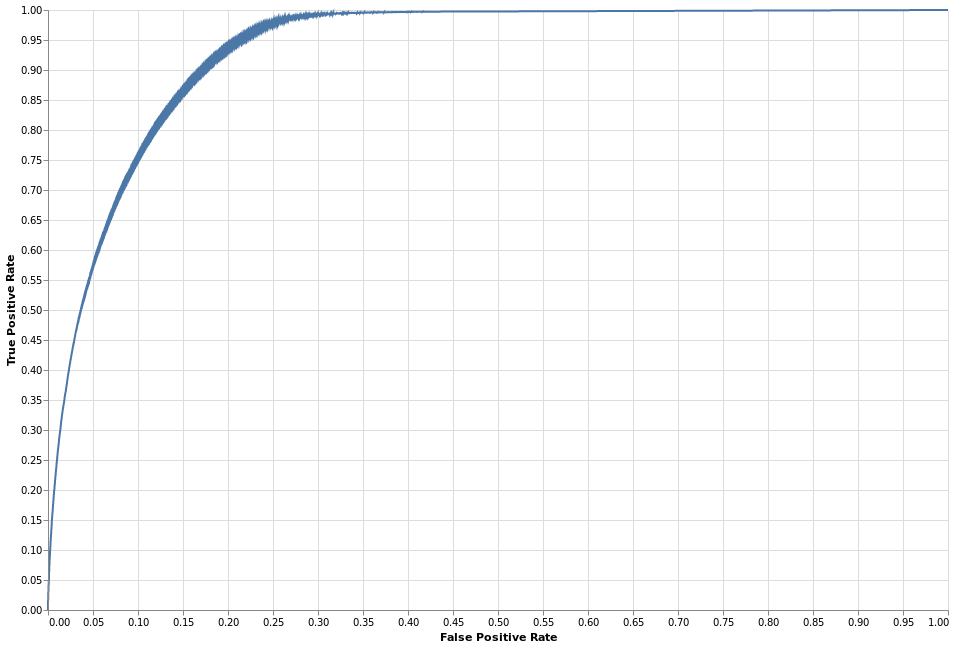

In [13]:
fpr, tpr, threshold = metrics.roc_curve(actual>0.9, np.tanh(predicted))
roc_data = pd.DataFrame({"True Positive Rate": tpr, "False Positive Rate": fpr})

alt.Chart(roc_data, width=900, height=600).mark_line().encode(
    x="False Positive Rate",
    y="True Positive Rate"
)

In [14]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
optimal_threshold

0.41435775

In [16]:
metrics.accuracy_score(actual>0.99, predicted>0.414)

0.8696024712242121

In [17]:
np.mean(actual>0.99)

0.5087301879160078

In [18]:
prec, recall, thr = metrics.precision_recall_curve(actual>0.9, np.tanh(predicted))

In [19]:
prec_recall = pd.DataFrame({"Precision": prec, "Recall": recall})

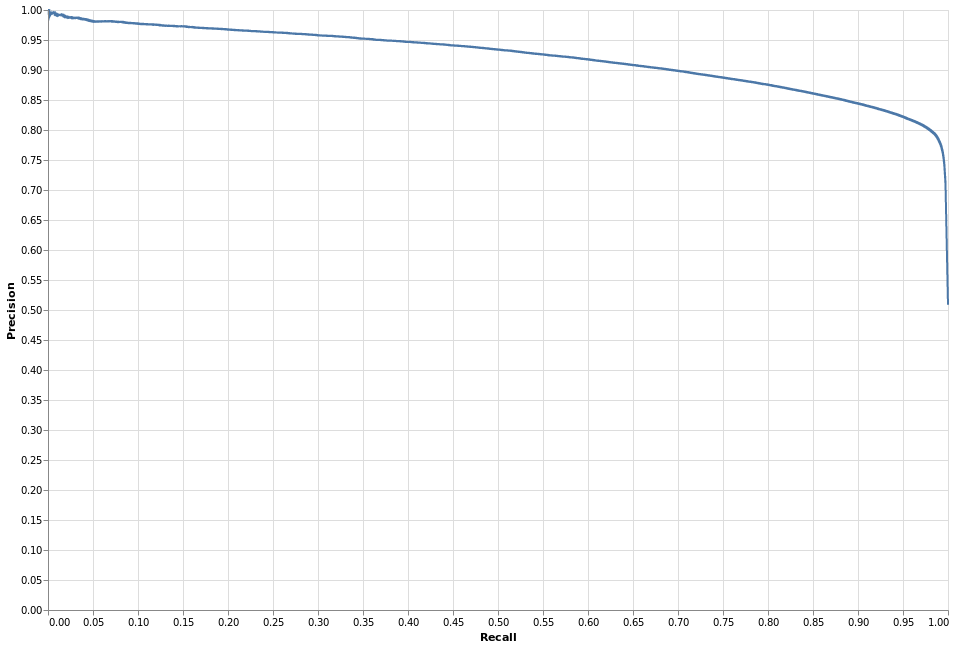

In [20]:
alt.Chart(prec_recall, width=900, height=600).mark_line().encode(
    x="Recall",
    y="Precision"
)

In [114]:
metrics.precision_score(actual>0.9, np.tanh(predicted)>0.00018)

0.6759728262014992

In [125]:
predicted = []
actual = []
for tree in test_dataset:
    predicted.append(model(tree).squeeze()[60:].detach().numpy())
    actual.append(tree.y.squeeze()[60:].numpy())

In [126]:
predicted = np.concatenate(predicted)
actual = np.concatenate(actual)

In [127]:
fpr, tpr, threshold = metrics.roc_curve(actual>0.9, np.tanh(predicted))
roc_data = pd.DataFrame({"True Positive Rate": tpr, "False Positive Rate": fpr})

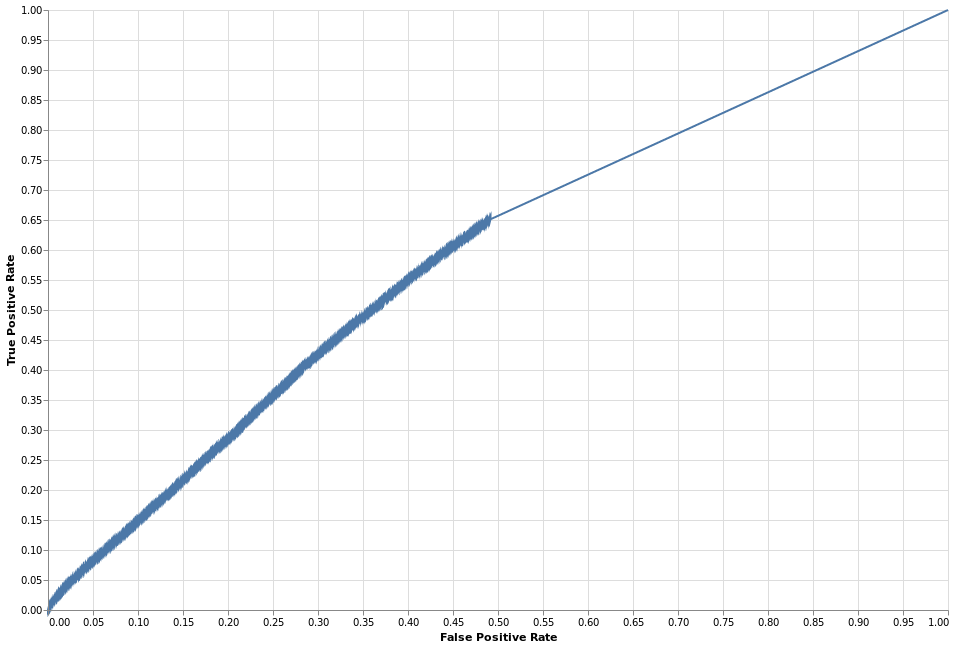

In [128]:
alt.Chart(roc_data, width=900, height=600).mark_line().encode(
    x="False Positive Rate",
    y="True Positive Rate"
)

In [137]:
target_tree = phy.read(data_path+'tree/Fungi45_infer/Fungi.tre', 'newick')
#all_data = gd.Trees.load_ready_trees(data_path+'tree/Fungi45_infer/fml_output/', data_path+'tree/Fungi45_infer/fml_output/*.tre', target_tree)  # INITIALIZE NEW DS
fungi_data = gd.Trees(data_path+'tree/Fungi45_infer/', data_path+'alns/Fungi45/', target_tree)
fungi_data.data.x = fungi_data.data.x.float()
fungi_data.data.edge_attr = (torch.max(fungi_data.data.edge_attr)+0.001 - fungi_data.data.edge_attr).float()
fungi_data.data.edge_index = fungi_data.data.edge_index.long()

In [138]:
predicted = []
actual = []
for tree in fungi_data:
    predicted.append(model(tree).squeeze().detach().numpy())
    actual.append(tree.y.squeeze().numpy())

predicted = np.concatenate(predicted)
actual = np.concatenate(actual)

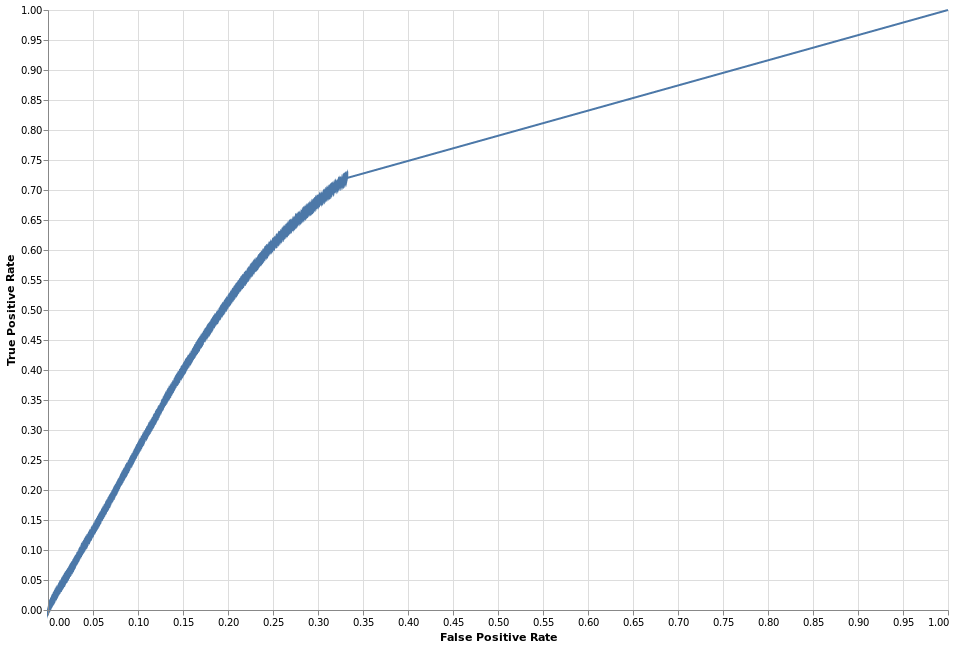

In [139]:
fpr, tpr, threshold = metrics.roc_curve(actual>0.9, np.tanh(predicted))
roc_data = pd.DataFrame({"True Positive Rate": tpr, "False Positive Rate": fpr})

alt.Chart(roc_data, width=900, height=600).mark_line().encode(
    x="False Positive Rate",
    y="True Positive Rate"
)

